In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as sn
import scipy.stats as stats
from matplotlib.backends.backend_pdf import PdfPages
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# READ CSV FILE

In [2]:
df = pd.read_csv("LimitPrediction.csv")

In [3]:
df.sample(5)

Customer Id   Income  Limit  Rating  Cards  Age  Education  Gender  \
128          129  123.299   8376     610      2   89         17    Male   
232          233   15.741   4788     360      1   39         14    Male   
141          142   91.876   6754     483      2   33         10    Male   
171          172   36.934   4270     299      1   63          9  Female   
138          139   21.374   2073     175      2   74         11  Female   

    Student Married  Balance  
128     Yes      No     1259  
232      No     Yes      689  
141      No     Yes      605  
171      No     Yes      283  
138      No     Yes        0

In [4]:
df.columns

Index(['Customer Id', 'Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education',
       'Gender', 'Student', 'Married', 'Balance'],
      dtype='object')

In [5]:
df.head()

Customer Id   Income  Limit  Rating  Cards  Age  Education  Gender Student  \
0            1   14.891   3606     283      2   34         11    Male      No   
1            2  106.025   6645     483      3   82         15  Female     Yes   
2            3  104.593   7075     514      4   71         11    Male      No   
3            4  148.924   9504     681      3   36         11  Female      No   
4            5   55.882   4897     357      2   68         16    Male      No   

  Married  Balance  
0     Yes      333  
1     Yes      903  
2      No      580  
3      No      964  
4     Yes      331

# DISPLAY PROFILING REPORT

In [6]:
import pandas_profiling
pandas_profiling.ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# PLOT SEABORN GRAPH FOR LIMIT AND INCOME

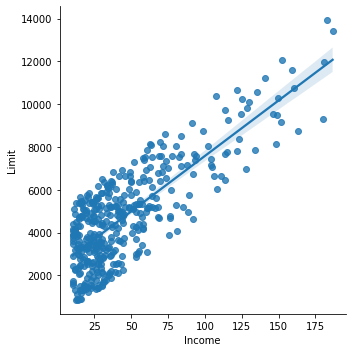

In [9]:
sns.lmplot(x='Income', y='Limit', data=df)

# Find Categorical variable in Data frame

In [10]:
numeric_var_names = [key for key in dict(df.dtypes) if dict(df.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]

# Find Categorical variable in Data frame
cat_var_names = [key for key in dict(df.dtypes) if dict(df.dtypes)[key] in ['object']]

#Print the data frame
print( numeric_var_names)
print(cat_var_names)

['Customer Id', 'Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education', 'Balance']
['Gender', 'Student', 'Married']


# START RFA THROUGH KAGGLE API

In [11]:
df_num=df[numeric_var_names]
df_num.head(5)


Customer Id   Income  Limit  Rating  Cards  Age  Education  Balance
0            1   14.891   3606     283      2   34         11      333
1            2  106.025   6645     483      3   82         15      903
2            3  104.593   7075     514      4   71         11      580
3            4  148.924   9504     681      3   36         11      964
4            5   55.882   4897     357      2   68         16      331

In [12]:
df_cat=df[cat_var_names]
df_cat.head(5)

Gender Student Married
0    Male      No     Yes
1  Female     Yes     Yes
2    Male      No      No
3  Female      No      No
4    Male      No     Yes

# APPLY LAMDA FUNCTION TO THE TEST DATA

In [13]:
def var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  x.std(), x.var(), x.min(), x.dropna().quantile(0.01), x.dropna().quantile(0.05),x.dropna().quantile(0.10),x.dropna().quantile(0.25),x.dropna().quantile(0.50),x.dropna().quantile(0.75), x.dropna().quantile(0.90),x.dropna().quantile(0.95), x.dropna().quantile(0.99),x.max()], 
                  index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1' , 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

num_summary=df_num.apply(lambda x: var_summary(x)).T

In [14]:
num_summary

N  NMISS          SUM         MEAN     MEDIAN          STD  \
Customer Id  400.0    0.0    80200.000   200.500000   200.5000   115.614301   
Income       400.0    0.0    18087.554    45.218885    33.1155    35.244273   
Limit        400.0    0.0  1894240.000  4735.600000  4622.5000  2308.198848   
Rating       400.0    0.0   141976.000   354.940000   344.0000   154.724143   
Cards        400.0    0.0     1183.000     2.957500     3.0000     1.371275   
Age          400.0    0.0    22267.000    55.667500    56.0000    17.249807   
Education    400.0    0.0     5380.000    13.450000    14.0000     3.125207   
Balance      400.0    0.0   208006.000   520.015000   459.5000   459.758877   

                      VAR      MIN         P1          P5        P10  \
Customer Id  1.336667e+04    1.000    4.99000    20.95000    40.9000   
Income       1.242159e+03   10.354   10.58715    12.06615    14.5834   
Limit        5.327782e+06  855.000  905.99000  1483.15000  1918.6000   
Rating       2.393956e+04   93.000  116.98000   138.00000   167.0000   
Cards        1.880395e+00    1.000    1.00000     1.00000     1.0000   
Age          2.975558e+02   23.000   24.99000    29.00000    32.0000   
Education    9.766917e+00    5.000    6.00000     8.00000     9.0000   
Balance      2.113782e+05    0.000    0.00000     0.00000     0.0000   

                    P25        P50         P75        P90        P95  \
Customer Id   100.75000   200.5000   300.25000   360.1000   380.0500   
Income         21.00725    33.1155    57.47075    92.4513   124.3495   
Limit        3088.00000  4622.5000  5872.75000  7659.8000  9161.8000   
Rating        247.25000   344.0000   437.25000   549.5000   642.7000   
Cards           2.00000     3.0000     4.00000     5.0000     5.0000   
Age            41.75000    56.0000    70.00000    79.1000    82.0000   
Education      11.00000    14.0000    16.00000    17.0000    18.0000   
Balance        68.75000   459.5000   863.00000  1151.4000  1355.3000   

                    P99        MAX  
Customer Id    396.0100    400.000  
Income         163.4995    186.634  
Limit        11592.7700  13913.000  
Rating         817.1100    982.000  
Cards            7.0000      9.000  
Age             87.0000     98.000  
Education       19.0000     20.000  
Balance       1677.1000   1999.000

In [15]:
def cat_summary(x):
    return pd.Series([x.count(),x.isnull().sum(),x.value_counts(),x.unique()],
                    index=['N','NMISS','ColumnNames','UniqueValues'])

In [16]:
cat_summary=df_cat.apply(lambda x:cat_summary(x)).T

In [17]:
cat_summary

N NMISS                                        ColumnNames  \
Gender   400     0  Female    207
 Male     193
Name: Gender, dtyp...   
Student  400     0  No     360
Yes     40
Name: Student, dtype: int64   
Married  400     0  Yes    245
No     155
Name: Married, dtype: int64   

            UniqueValues  
Gender   [ Male, Female]  
Student        [No, Yes]  
Married        [Yes, No]

In [18]:
df_new = pd.concat([df_num, df_cat], axis=1)


In [19]:
df_new.head()

Customer Id   Income  Limit  Rating  Cards  Age  Education  Balance  \
0            1   14.891   3606     283      2   34         11      333   
1            2  106.025   6645     483      3   82         15      903   
2            3  104.593   7075     514      4   71         11      580   
3            4  148.924   9504     681      3   36         11      964   
4            5   55.882   4897     357      2   68         16      331   

   Gender Student Married  
0    Male      No     Yes  
1  Female     Yes     Yes  
2    Male      No      No  
3  Female      No      No  
4    Male      No     Yes

In [20]:
df_new.shape

(400, 11)

# PREDICT LIMIT OF THE DATA

<AxesSubplot:xlabel='Limit', ylabel='Density'>

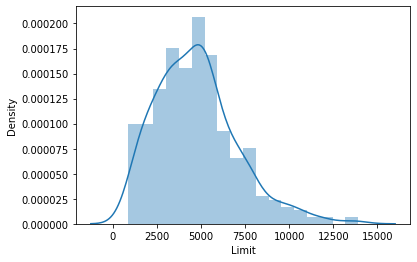

In [21]:
import seaborn as sns
sns.distplot(df_new.Limit)

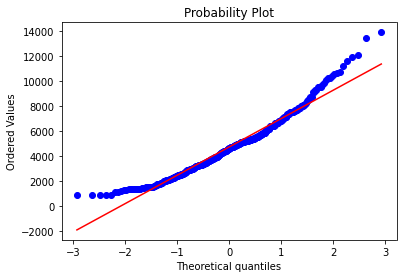

In [22]:
from scipy import stats
import pylab

stats.probplot(df_new.Limit, dist="norm", plot=pylab )
pylab.show()

In [23]:
df_new['bc_Limit_predict'],fitted_lambda = stats.boxcox(df_new['Limit'])

<AxesSubplot:xlabel='bc_Limit_predict', ylabel='Density'>

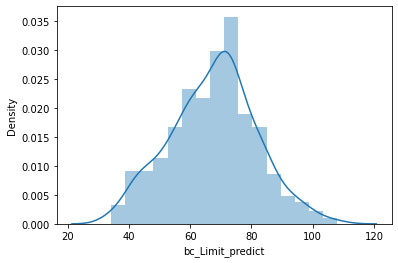

In [24]:
sns.distplot(df_new.bc_Limit_predict)

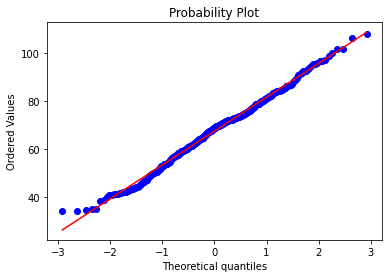

In [25]:
stats.probplot(df_new.bc_Limit_predict, dist="norm", plot=pylab )
pylab.show()

In [26]:
df_new.drop(['Limit'],axis=1,inplace=True)

In [27]:
feature_columns=df_new.columns.difference(['bc_Limit_predict'])

# TRAIN TEST DATA THROUGH SKLEARN

In [28]:
from sklearn.model_selection import train_test_split

train_x,test_x,train_y,test_y=train_test_split(df_new[feature_columns],
                                              df_new['bc_Limit_predict'],
                                              test_size=0.2,
                                              random_state=12)

In [29]:
print (len(train_x))
print (len(test_x))
print (len(train_y))
print (len(test_y))

320
80
320
80
